# Cancer Data Prediction with Multiple Models

This notebook demonstrates how to predict cancer diagnoses using various machine learning models, including Simple Linear Regression, Multiple Linear Regression, Polynomial Regression, SVR, Random Forest, Decision Tree, Logistic Regression, KNN, SVM, Kernel SVM, and Naive Bayes. We will also perform hyperparameter tuning using Grid Search to optimize model performance.




## Step 1: Import Required Libraries

In [2]:
# Importing necessary libraries for data handling, visualization, and machine learning models.
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV # For splitting the dataset and performing hyperparameter tuning
from sklearn.preprocessing import StandardScaler, PolynomialFeatures # For data scaling and polynomial features
from sklearn import svm # Support Vector Machine model
from sklearn.ensemble import RandomForestClassifier # Random Forest model
from sklearn.linear_model import LogisticRegression, LinearRegression # Logistic and Linear Regression models
from sklearn.metrics import accuracy_score # For calculating accuracy of models
from sklearn.neighbors import KNeighborsClassifier # K-Nearest Neighbors model
from sklearn.tree import DecisionTreeClassifier # Decision Tree model
from sklearn.svm import SVR # Support Vector Regression model
from sklearn.naive_bayes import GaussianNB # Naive Bayes model
import matplotlib.pyplot as plt # For visualizing results

## Step 2: Load and Preprocess the Data

In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_csv("Cancer_Data.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [5]:
# Drop unnecessary columns ('Unnamed: 32' and 'id') that don't provide useful information for prediction
data.drop(["Unnamed: 32", "id"], axis=1, inplace=True)

In [6]:
# Convert diagnosis column into binary values: 1 for malignant (M), 0 for benign (B)
data.diagnosis = [1 if each == "M" else 0 for each in data.diagnosis]

In [7]:
# Separate features (x_data) and target variable (y)
x_data = data.drop(["diagnosis"], axis=1) # Features are all columns except 'diagnosis'
y = data.diagnosis.values # Target variable is 'diagnosis'

In [8]:
# Normalize the feature data using min-max scaling
x = (x_data - x_data.min()) / (x_data.max() - x_data.min())

In [9]:
# Now x contains the normalized features, and y contains the binary target
print(x.head())
print(y[:5])

   radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     0.521037      0.022658        0.545989   0.363733         0.593753   
1     0.643144      0.272574        0.615783   0.501591         0.289880   
2     0.601496      0.390260        0.595743   0.449417         0.514309   
3     0.210090      0.360839        0.233501   0.102906         0.811321   
4     0.629893      0.156578        0.630986   0.489290         0.430351   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0          0.792037        0.703140             0.731113       0.686364   
1          0.181768        0.203608             0.348757       0.379798   
2          0.431017        0.462512             0.635686       0.509596   
3          0.811361        0.565604             0.522863       0.776263   
4          0.347893        0.463918             0.518390       0.378283   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0           

##  Step 3: Split the Data into Training and Test Sets

In [10]:
# Split the data into 80% training and 20% testing to evaluate model performance
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [11]:
# Standardize the features
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Step 4: Define Model Parameters for Grid Search

In [12]:
# Define model parameters for Grid Search
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver='liblinear', multi_class='auto'),
        'params': {
            'C': [1, 5, 10]
        }
    },
    'knn': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 10]
        }
    },
    'decision_tree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'max_depth': [None, 5, 10]
        }
    },
    'naive_bayes': {
        'model': GaussianNB(),
        'params': {}
    },
    'linear_regression': {
        'model': LinearRegression(),
        'params': {}
    },
    'multiple_linear': {
        'model': LinearRegression(),
        'params': {}
    },
    'polynomial_regression': {
        'model': None,  # Placeholder for polynomial regression
        'params': {}
    },
    'svr': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'rbf'],
            'C': [1, 10]
        }
    }
}


## Step 5: Perform Grid Search and Collect Scores

In [13]:
# Initialize an empty list to store scores
scores = []

# Loop through each model defined in the model_params dictionary
for model_name, mp in model_params.items():
    # Check if the model is Polynomial Regression
    if model_name == 'polynomial_regression':
        # Transform the feature data to include polynomial terms
        poly = PolynomialFeatures(degree=2)  # Create polynomial features of degree 2
        x_train_poly = poly.fit_transform(x_train)  # Fit and transform the training data
        x_test_poly = poly.transform(x_test)  # Transform the test data using the same polynomial features

        # Initialize and fit a Linear Regression model
        clf = LinearRegression()
        clf.fit(x_train_poly, y_train)  # Fit the model to the polynomial training data

        # Make predictions on the test data and round the results to get binary values
        y_pred_poly = clf.predict(x_test_poly)
        accuracy = accuracy_score(y_test, np.round(y_pred_poly))  # Calculate accuracy of predictions

        # Append the model name, accuracy, and empty parameters to the scores list
        scores.append({
            'model': model_name,
            'best_score': accuracy,  # Store the accuracy for Polynomial Regression
            'best_params': {}  # No parameters to report for this model
        })
        continue  # Skip to the next model in the loop

    # For other models, perform Grid Search to find the best hyperparameters
    clf = GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)  # Initialize Grid Search
    clf.fit(x_train, y_train)  # Fit the model to the training data

    # Append the model name, best score, and best parameters to the scores list
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,  # Store the best accuracy found during Grid Search
        'best_params': clf.best_params_  # Store the best parameters found during Grid Search
    })


## Step 6: Convert Results to DataFrame and Print

In [14]:
# Convert scores to a DataFrame for easy visualization
df = pd.DataFrame(scores, columns=['model', 'best_score', 'best_params'])
print(df)

                   model  best_score                 best_params
0                    svm    0.973626  {'C': 10, 'kernel': 'rbf'}
1          random_forest    0.949451         {'n_estimators': 5}
2    logistic_regression    0.978022                    {'C': 5}
3                    knn    0.960440          {'n_neighbors': 5}
4          decision_tree    0.920879            {'max_depth': 5}
5            naive_bayes    0.934066                          {}
6      linear_regression    0.692497                          {}
7        multiple_linear    0.692497                          {}
8  polynomial_regression    0.298246                          {}
9                    svr    0.839853   {'C': 1, 'kernel': 'rbf'}


## Step 7: Evaluate the Best Model

In [15]:
# Identify the best model based on the highest score in the DataFrame
best_model_name = df.loc[df['best_score'].idxmax(), 'model']  # Get the model name with the highest score
best_model_params = df.loc[df['best_score'].idxmax(), 'best_params']  # Get the corresponding best parameters

# Train the best model with the identified best parameters
if best_model_name == 'polynomial_regression':
    # For Polynomial Regression, transform the training data again
    poly = PolynomialFeatures(degree=2)  # Create polynomial features of degree 2
    x_train_poly = poly.fit_transform(x_train)  # Fit and transform the training data
    best_model = LinearRegression()  # Initialize a Linear Regression model
    best_model.fit(x_train_poly, y_train)  # Fit the model to the polynomial training data
else:
    # For other models, update the model with the best parameters
    best_model = model_params[best_model_name]['model'].set_params(**best_model_params)  # Set the best parameters
    best_model.fit(x_train, y_train)  # Fit the model to the training data

# Predict and evaluate on the test set
if best_model_name == 'polynomial_regression':
    x_test_poly = poly.transform(x_test)  # Transform the test data to polynomial features
    y_pred_best = best_model.predict(x_test_poly)  # Make predictions using the best model
else:
    y_pred_best = best_model.predict(x_test)  # Make predictions using the best model for other cases

# Calculate the accuracy of the best model on the test set
best_accuracy = accuracy_score(y_test, np.round(y_pred_best))  # Evaluate accuracy

# Print the name of the best model and its test accuracy
print(f"Best Model: {best_model_name}, Test Accuracy: {best_accuracy}")


Best Model: logistic_regression, Test Accuracy: 0.9736842105263158


## Step 8: Visualize Model Accuracies

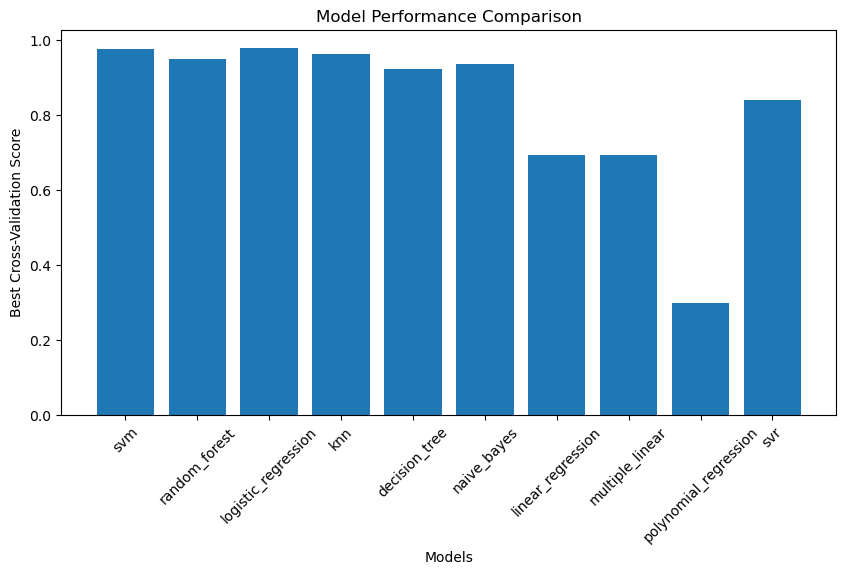

In [16]:
# Optional: Visualize the performance of different models
plt.figure(figsize=(10, 5))
plt.bar(df['model'], df['best_score'])
plt.xlabel('Models')
plt.ylabel('Best Cross-Validation Score')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.show()
